# Table of contents

* [Cleaning](#cleaning)
* [x-y-split](#split)
* [Linear Regression](#lg)
* [Model Validation - Metrics](#metrics)

# Cleaning <a class="anchor" id="cleaning"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fifa = pd.read_csv("fifa21_train.csv")
#fifa.head()
fifa.columns[:50]

Index(['ID', 'Name', 'Age', 'Nationality', 'Club', 'BP', 'Position',
       'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending'],
      dtype='object')

In [2]:
fifa.columns[50:]

Index(['Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'OVA'],
      dtype='object')

In [3]:
#fifa.dtypes
fifa.shape

(11701, 101)

In [4]:
# standardizing header names

cols_1 = []
for column in fifa.columns:
    cols_1.append(column.lower())
fifa.columns = cols_1
fifa.columns = fifa.columns.str.replace(" ","_")
fifa.head()

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [5]:
fifa.columns[:50]

Index(['id', 'name', 'age', 'nationality', 'club', 'bp', 'position',
       'team_&_contract', 'height', 'weight', 'foot', 'growth', 'joined',
       'loan_date_end', 'value', 'wage', 'release_clause', 'contract',
       'attacking', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'skill', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending'],
      dtype='object')

In [6]:
fifa.columns[50:]

Index(['marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'total_stats', 'base_stats', 'w/f', 'sm', 'a/w', 'd/w',
       'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk', 'ova'],
      dtype='object')

In [7]:
# deleting "+_" values + converting to float
fifa[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',]]


for col in fifa[['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',]]:
   fifa[col] = fifa[col].str.split("+", n = 1, expand = True)[0].astype("float")
  

In [8]:
# checking

fifa.head()


,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15.0,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18.0,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12.0,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14.0,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15.0,65


In [9]:
# mean for composure NaN values

mean_median_composure = fifa['composure'].mean()
fifa['composure'] = fifa['composure'].fillna(mean_median_composure)

In [10]:
# dropping unneccesary columns

fifa = fifa.drop(["loan_date_end"],axis =1) # to many NaNs
fifa = fifa.drop(["id"],axis =1)
fifa = fifa.drop(["growth"],axis =1) # low correlation with ova
fifa = fifa.drop(["team_&_contract"],axis =1)
fifa = fifa.drop(["contract"],axis =1)
fifa = fifa.drop(["w/f"],axis =1) # unknown feature
fifa = fifa.drop(["sm"],axis =1) # see above
fifa = fifa.drop(["ir"],axis =1) # see above
fifa = fifa.drop(["height"],axis =1) # useless american metric

# dropping columns "attacking" through "goalkeeping" -> sum of total stats
fifa = fifa[["name","age","nationality","club","bp","position",
             "weight","foot","joined","value","wage","release_clause","marking",
            "total_stats","base_stats","a/w","d/w","pac","sho","pas","dri",
            "def","phy","hits",'ls','st','rs','lw','lf','cf','rf','rw','lam',
             'cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb',
             'lb','lcb','cb','rcb','rb','gk',"ova"]]
fifa.head()

,name,age,nationality,club,bp,position,weight,foot,joined,value,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,161lbs,Right,"Jul 1, 2015",€525K,...,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15.0,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,159lbs,Right,"Jan 16, 2015",€8.5M,...,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18.0,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,134lbs,Right,"Jan 31, 2019",€9M,...,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12.0,80
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,152lbs,Right,"Jul 1, 2016",€275K,...,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14.0,59
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,150lbs,Right,"Jul 1, 2018",€725K,...,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15.0,65


In [11]:
# wage: replacing € + K, converting to float
fifa["wage"] = fifa['wage'].apply(lambda x: x.replace('€', ''))
fifa["wage"] = fifa['wage'].apply(lambda x: x.replace('K', '000'))
fifa['wage'] = fifa['wage'].astype('float')
fifa['wage']

0         4000.0
1        23000.0
2        49000.0
3         4000.0
4         2000.0
          ...   
11696     3000.0
11697     4000.0
11698     2000.0
11699        0.0
11700     2000.0
Name: wage, Length: 11701, dtype: float64

In [12]:
# release_clause: replacing € + K + M, converting to float

fifa["release_clause"] = fifa['release_clause'].apply(lambda x: x.replace('.', ''))
fifa["release_clause"] = fifa['release_clause'].apply(lambda x: x.replace('€', ''))
fifa["release_clause"] = fifa['release_clause'].apply(lambda x: x.replace('K', '000'))
fifa["release_clause"] = fifa['release_clause'].apply(lambda x: x.replace('M', '000000'))
fifa['release_clause'] = fifa["release_clause"].astype('float')
fifa["release_clause"]

0           801000.0
1                0.0
2        153000000.0
3           694000.0
4         14000000.0
            ...     
11696       891000.0
11697     29000000.0
11698     17000000.0
11699            0.0
11700     12000000.0
Name: release_clause, Length: 11701, dtype: float64

In [13]:
# value: replacing € + K + M, converting to float

fifa["value"] = fifa['value'].apply(lambda x: x.replace('.', ''))
fifa["value"] = fifa['value'].apply(lambda x: x.replace('€', ''))
fifa["value"] = fifa['value'].apply(lambda x: x.replace('K', '000'))
fifa["value"] = fifa['value'].apply(lambda x: x.replace('M', '000000'))
fifa['value'] = fifa['value'].astype('float')
fifa["value"]

0          525000.0
1        85000000.0
2         9000000.0
3          275000.0
4          725000.0
            ...    
11696      625000.0
11697    16000000.0
11698    11000000.0
11699           0.0
11700      700000.0
Name: value, Length: 11701, dtype: float64

In [14]:
# weight: replacing lbs, converting to float

fifa["weight"] = fifa['weight'].apply(lambda x: x.replace('lbs', ''))
fifa['weight'] = fifa['weight'].astype('float')
fifa["weight"]


0        161.0
1        159.0
2        134.0
3        152.0
4        150.0
         ...  
11696    168.0
11697    174.0
11698    143.0
11699    179.0
11700    143.0
Name: weight, Length: 11701, dtype: float64

In [15]:
# converting hits to numeric
fifa['hits'] =  pd.to_numeric(fifa['hits'], errors='coerce')
#fifa['hits'] = fifa['hits'].astype('float')
fifa['hits'].isna().sum()

42

In [16]:
# checking for NaNs

fifa[fifa.columns[fifa.isna().any()]]
# nulls_df = pd.DataFrame(round(fifa_num.isna().sum()/len(fifa_num),4)*100)
# nulls_df

,club,position,joined,a/w,d/w,hits
0,FC Lausanne-Sport,CM CDM,"Jul 1, 2015",High,Medium,3.0
1,Beijing Sinobo Guoan FC,ST LW LM,"Jan 16, 2015",High,Low,44.0
2,Al Hilal,CAM CF,"Jan 31, 2019",High,Medium,73.0
3,Swansea City,CDM CM,"Jul 1, 2016",Medium,Medium,7.0
4,US Orléans Loiret Football,CDM CM,"Jul 1, 2018",Low,Medium,4.0
...,...,...,...,...,...,...
11696,Jagiellonia Białystok,LB,"Feb 8, 2018",Medium,Medium,3.0
11697,ESTAC Troyes,GK,"Jul 1, 2019",Medium,Medium,3.0
11698,CD Antofagasta,LM CAM RM,"Jan 23, 2019",High,Medium,6.0
11699,Barnsley,NaN,NaN,NaN,NaN,3.0


In [17]:
# dropping columns with NaN values: club, joined, loan date end, position, a/w, d/w, hits
# only a very small percentage of data
print("Before:", fifa.shape)

fifa = fifa[fifa['club'].isna()==False]
fifa = fifa[fifa['joined'].isna()==False]
fifa = fifa[fifa['position'].isna()==False]
fifa = fifa[fifa['a/w'].isna()==False]
fifa = fifa[fifa['d/w'].isna()==False]
fifa = fifa[fifa['hits'].isna()==False]

print("After: ", fifa.shape)


Before: (11701, 52)
After:  (11320, 52)


In [18]:
#checking again for NaNs

fifa[fifa.columns[fifa.isna().any()]]

""
0
1
2
3
4
...
11695
11696
11697
11698


In [19]:
fifa.shape

(11320, 52)

In [20]:
fifa.head()

,name,age,nationality,club,bp,position,weight,foot,joined,value,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,161.0,Right,"Jul 1, 2015",525000.0,...,59.0,59.0,59.0,58.0,54.0,54.0,54.0,58.0,15.0,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,159.0,Right,"Jan 16, 2015",85000000.0,...,53.0,53.0,57.0,53.0,48.0,48.0,48.0,53.0,18.0,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,134.0,Right,"Jan 31, 2019",9000000.0,...,56.0,56.0,59.0,53.0,41.0,41.0,41.0,53.0,12.0,80
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,152.0,Right,"Jul 1, 2016",275000.0,...,58.0,58.0,56.0,57.0,58.0,58.0,58.0,57.0,14.0,59
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,150.0,Right,"Jul 1, 2018",725000.0,...,64.0,64.0,64.0,63.0,61.0,61.0,61.0,63.0,15.0,65


In [21]:
# # visualizing
# for col in fifa:
#     num_all = sns.histplot(data=fifa,x=col,kde=True)
#     plt.title(col)
#     plt.show(num_all)

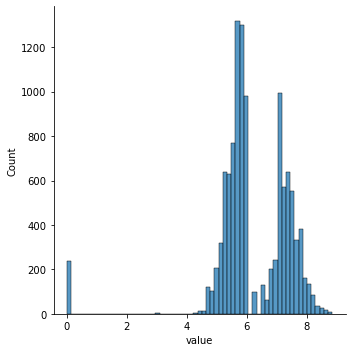

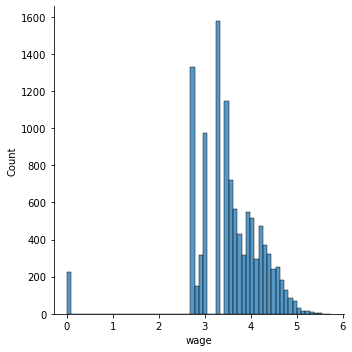

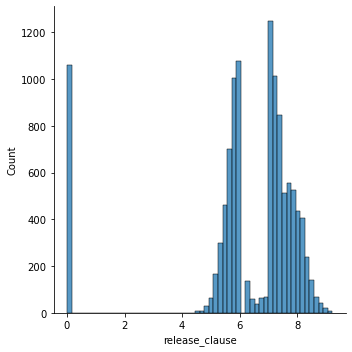

,name,age,nationality,club,bp,position,weight,foot,joined,marking,...,lb,lcb,cb,rcb,rb,gk,ova,value_log,wage_log,release_clause_log
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,161.0,Right,"Jul 1, 2015",49,...,58.0,54.0,54.0,54.0,58.0,15.0,64,5.720159,3.602060,5.903633
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,159.0,Right,"Jan 16, 2015",35,...,53.0,48.0,48.0,48.0,53.0,18.0,77,7.929419,4.361728,0.000000
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,134.0,Right,"Jan 31, 2019",23,...,53.0,41.0,41.0,41.0,53.0,12.0,80,6.954243,4.690196,8.184691
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,152.0,Right,"Jul 1, 2016",55,...,57.0,58.0,58.0,58.0,57.0,14.0,59,5.439333,3.602060,5.841359
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,150.0,Right,"Jul 1, 2018",58,...,63.0,61.0,61.0,61.0,63.0,15.0,65,5.860338,3.301030,7.146128


In [22]:
# scaling down value, wage and release clause

def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

value_log = fifa['value'].apply(lambda x :log_transfom_clean1(x))
wage_log = fifa['wage'].apply(lambda x :log_transfom_clean1(x))
release_clause_log = fifa['release_clause'].apply(lambda x :log_transfom_clean1(x))

# checking new scaling on a plot
sns.displot(value_log)
sns.displot(wage_log)
sns.displot(release_clause_log)
plt.show()

# adding _log to fifa database

fifa["value_log"] = value_log
fifa["wage_log"] = wage_log
fifa["release_clause_log"] = release_clause_log

# dropping original columns

fifa = fifa.drop(["value"], axis = 1)
fifa = fifa.drop(["wage"], axis = 1)
fifa = fifa.drop(["release_clause"], axis = 1)

fifa.head()

In [23]:
# placeholder cell for bonus

In [24]:
# saving cleaned data

fifa.to_csv("fifa_cleaned.csv")

 #### end of cleaning
 
 

In [26]:
# clean_fifa21(fifa)

# x -y - split <a class="anchor" id="split"></a>

In [27]:
import pandas as pd

In [28]:
# splitting 

fifa = pd.read_csv("fifa_cleaned.csv")

# drop columns
# X=X.drop(columns=['customer', 'effective_to_date'])

# X and y

y = fifa['ova'] # target 
X = fifa.drop(['ova'], axis = 1) # features

In [29]:
# numerical and categorical split
fifa_cat = X.select_dtypes(include="object")
fifa_num = X.select_dtypes(include=np.number)
print (X.shape, fifa_num.shape, fifa_cat.shape)

(11320, 52) (11320, 43) (11320, 9)


In [30]:
fifa_num.describe()#.T

,Unnamed: 0,age,weight,marking,total_stats,base_stats,pac,sho,pas,dri,...,rwb,lb,lcb,cb,rcb,rb,gk,value_log,wage_log,release_clause_log
count,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,...,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000,11320.000000
mean,5850.993375,25.064223,165.463516,46.948675,1629.164399,360.763428,68.267314,54.870760,58.750088,64.163869,...,55.076060,54.259011,53.059187,53.059187,53.059187,54.259011,20.682774,6.195776,3.529669,6.198373
std,3377.411041,4.802728,15.748131,20.140603,259.756383,40.326567,11.076699,13.848759,10.151533,9.805111,...,13.229039,13.515863,14.553648,14.553648,14.553648,13.515863,14.513666,1.299066,0.775774,2.201841
min,0.000000,16.000000,117.000000,3.000000,731.000000,228.000000,26.000000,17.000000,25.000000,28.000000,...,14.000000,14.000000,16.000000,16.000000,16.000000,14.000000,9.000000,0.000000,0.000000,0.000000
25%,2927.750000,21.000000,154.000000,29.000000,1490.000000,332.000000,62.000000,46.000000,52.000000,59.000000,...,49.000000,47.000000,43.000000,43.000000,43.000000,47.000000,15.000000,5.574031,3.000000,5.727541
50%,5847.500000,25.000000,165.000000,52.000000,1658.000000,362.000000,69.000000,57.000000,59.000000,65.000000,...,57.000000,57.000000,55.000000,55.000000,55.000000,57.000000,16.000000,5.903090,3.477121,7.079181
75%,8775.250000,28.000000,176.000000,64.000000,1810.000000,389.000000,76.000000,65.000000,66.000000,71.000000,...,64.000000,64.000000,65.000000,65.000000,65.000000,64.000000,18.000000,7.176091,4.041393,7.518514
max,11700.000000,43.000000,243.000000,92.000000,2304.000000,490.000000,95.000000,93.000000,93.000000,95.000000,...,84.000000,83.000000,88.000000,88.000000,88.000000,83.000000,88.000000,8.860338,5.748188,9.221414


### Normalizing numerical data

In [31]:
fifa_num

,Unnamed: 0,age,weight,marking,total_stats,base_stats,pac,sho,pas,dri,...,rwb,lb,lcb,cb,rcb,rb,gk,value_log,wage_log,release_clause_log
0,0,26,161.0,49,1682,357,69,51,63,63,...,59.0,58.0,54.0,54.0,54.0,58.0,15.0,5.720159,3.602060,5.903633
1,1,30,159.0,35,1961,412,83,75,68,82,...,57.0,53.0,48.0,48.0,48.0,53.0,18.0,7.929419,4.361728,0.000000
2,2,33,134.0,23,1925,404,80,77,78,86,...,59.0,53.0,41.0,41.0,41.0,53.0,12.0,6.954243,4.690196,8.184691
3,3,22,152.0,55,1527,329,57,44,54,57,...,56.0,57.0,58.0,58.0,58.0,57.0,14.0,5.439333,3.602060,5.841359
4,4,23,150.0,58,1664,360,66,44,60,64,...,64.0,63.0,61.0,61.0,61.0,63.0,15.0,5.860338,3.301030,7.146128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315,11695,29,154.0,41,1638,337,66,68,47,66,...,46.0,44.0,43.0,43.0,43.0,44.0,19.0,5.740363,2.698970,7.079181
11316,11696,25,168.0,59,1589,347,75,28,56,59,...,63.0,63.0,61.0,61.0,61.0,63.0,16.0,5.795880,3.477121,5.949878
11317,11697,27,174.0,12,1123,387,72,67,66,72,...,25.0,24.0,26.0,26.0,26.0,24.0,69.0,7.204120,3.602060,7.462398
11318,11698,22,143.0,37,1603,337,76,60,60,72,...,49.0,45.0,35.0,35.0,35.0,45.0,17.0,7.041393,3.301030,7.230449


In [32]:
# scaling numerical features

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(fifa_num)
X_normalized = transformer.transform(fifa_num)

#print(x_normalized.shape)
#X_normalized
fifa_num_minmax = pd.DataFrame(X_normalized, columns=fifa_num.columns)
# checking
fifa_num_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11320.0,0.500085,0.288668,0.0,0.250235,0.499786,0.750021,1.0
age,11320.0,0.335712,0.177879,0.0,0.185185,0.333333,0.444444,1.0
weight,11320.0,0.384631,0.124985,0.0,0.293651,0.380952,0.468254,1.0
marking,11320.0,0.493805,0.226299,0.0,0.292135,0.550562,0.685393,1.0
total_stats,11320.0,0.570988,0.165134,0.0,0.482517,0.589320,0.685950,1.0
base_stats,11320.0,0.506731,0.153918,0.0,0.396947,0.511450,0.614504,1.0
pac,11320.0,0.612570,0.160532,0.0,0.521739,0.623188,0.724638,1.0
sho,11320.0,0.498299,0.182221,0.0,0.381579,0.526316,0.631579,1.0
pas,11320.0,0.496325,0.149287,0.0,0.397059,0.500000,0.602941,1.0
dri,11320.0,0.539759,0.146345,0.0,0.462687,0.552239,0.641791,1.0


### Normalizing categorical data

In [33]:
fifa_cat.describe().T

,count,unique,top,freq
name,11320,10886,J. Rojas,8
nationality,11320,158,England,1116
club,11320,875,OGC Nice,35
bp,11320,15,CB,2098
position,11320,539,CB,1343
foot,11320,2,Right,8529
joined,11320,1645,"Jul 1, 2019",809
a/w,11320,3,Medium,7301
d/w,11320,3,Medium,8152


In [34]:
# dropping columns with too many unique values

fifa_cat = fifa_cat.drop(["name"], axis = 1)
fifa_cat = fifa_cat.drop(["nationality"], axis = 1)
fifa_cat = fifa_cat.drop(["club"], axis = 1)
fifa_cat = fifa_cat.drop(["position"], axis = 1)
fifa_cat = fifa_cat.drop(["joined"], axis = 1)

fifa_cat

,bp,foot,a/w,d/w
0,CM,Right,High,Medium
1,ST,Right,High,Low
2,CAM,Right,High,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Low,Medium
...,...,...,...,...
11315,ST,Right,High,Low
11316,LB,Left,Medium,Medium
11317,GK,Right,Medium,Medium
11318,RM,Right,High,Medium


In [35]:
# encoding all columns of fifa_cat
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(fifa_cat) # first drops first column of every category
encoded = encoder.transform(fifa_cat).toarray()
cols = encoder.get_feature_names(input_features=fifa_cat.columns)
#cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head()

C:\Users\egheb\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [36]:
# concat both fifa_num and fifa_cat: fifa_num_minmax + onehot_encoded

fifa_whole = pd.concat([fifa_num_minmax, onehot_encoded], axis=1)

#### end of normalizing

# Linear Regression <a class="anchor" id="lg"></a>

## Train-test split

In [37]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train, X_test, y_train, y_test = train_test_split(fifa_whole, y, test_size=0.2, random_state=42)

In [38]:
print("X_train ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

X_train  (9056, 62)
X_test:  (2264, 62)
y_train: (9056,)
y_test:  (2264,)


In [39]:
X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ova   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1567.
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:15:22   Log-Likelihood:                -20402.
No. Observations:                9056   AIC:                         4.090e+04
Df Residuals:                    9010   BIC:                         4.122e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 26.0312      0

In [41]:
# train/fit the model
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train


LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)

print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 2.3024394189083575 -- test RMSE: 2.323906566117118


#### end of regression

In [43]:
# get dummies pandas
pd.get_dummies(fifa_cat, drop_first=True).head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [44]:
from sklearn.preprocessing import OneHotEncoder

pd.DataFrame(OneHotEncoder(drop='first').fit_transform(fifa_cat).toarray(),
             columns=OneHotEncoder(drop='first').fit(fifa_cat).get_feature_names(input_features=fifa_cat.columns)).head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [45]:
fifa_cat=pd.get_dummies(fifa_cat, drop_first=True)
X=pd.concat([fifa_num, fifa_cat], axis=1) # concat numerical and categorical transformations
X.head()

,Unnamed: 0,age,weight,marking,total_stats,base_stats,pac,sho,pas,dri,...,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0,26,161.0,49,1682,357,69,51,63,63,...,0,0,0,0,0,1,0,0,0,1
1,1,30,159.0,35,1961,412,83,75,68,82,...,0,0,0,0,1,1,0,0,1,0
2,2,33,134.0,23,1925,404,80,77,78,86,...,0,0,0,0,0,1,0,0,0,1
3,3,22,152.0,55,1527,329,57,44,54,57,...,0,0,0,0,0,1,0,1,0,1
4,4,23,150.0,58,1664,360,66,44,60,64,...,0,0,0,0,0,1,1,0,0,1


# Model Validation - Metrics <a class="anchor" id="metrics"></a>

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# r2 score
predictions_test = linreg.predict(X_test)
print("r2 Score of test Data: ",round(r2_score(y_test, predictions_test),3))
predictions_train = linreg.predict(X_train)
print("r2 Score of train Data: ",round(r2_score(y_train, predictions_train),3), "\n")

r2 Score of test Data:  0.888
r2 Score of train Data:  0.887 



In [47]:
# mse
y_pred = linreg.predict(fifa_whole)
print("mean squared error: ",round(mean_squared_error(y_pred,y),3))

mean squared error:  5.321


In [48]:
# rmse
print("rooted mean squared error: ", round(np.sqrt(mean_squared_error(y_pred,y)),3),"\n")

rooted mean squared error:  2.307 



In [49]:
# mae
mae_test = mean_absolute_error(y_test, predictions_test)
print("mean absolute error of test data:",round(mae_test,3))
mae_train = mean_absolute_error(y_train, predictions_train)
print("mean absolute error of train data:", round(mae_train,3))

mean absolute error of test data: 1.753
mean absolute error of train data: 1.757


#### end of metrics

In [50]:
# New Data